In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

# Data wrangling and exploration

We begin by loading the two data sets and looking at the different attributes. We decide to add two columns **Movie release year** and **Actor birth year**.

In [7]:
# Load cleaned datasets
movie_metadata = pd.read_csv('data_cleaned/movie_cleaned.csv', lineterminator='\n')
character_metadata = pd.read_csv('data_cleaned/character_cleaned.csv')

## Distribution of variables in the character dataset

We now want to look at the distribution of the attributes of the characters metadata set. We divide the character dataset into male and female character dataset, and use box plots and histograms to look at the distribution on the attributes. We also perform a t-test for each of the attributes with the nul-hypothesis: there is no difference between male and female.

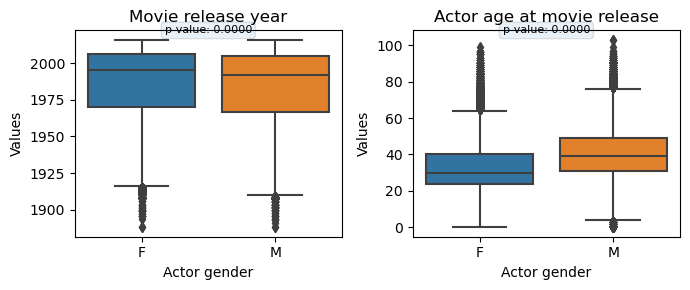

In [8]:
# Variables of interest
#variables = ['Movie release year', 'Actor birth year', 'Actor height', 'Actor age at movie release']

# Variables of interest
variables = ['Movie release year', 'Actor age at movie release']

# Create a figure with four subplots
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# Create box plots for each variable in each subplot
for i, variable in enumerate(variables):
    ax = axes[i]

    # Use sns.boxplot with 'Actor gender' as 'hue'
    sns.boxplot(x='Actor gender', y=variable, data=character_metadata, ax=ax)

    # Perform a t-test and get the p-value
    female_data = character_metadata[character_metadata['Actor gender'] == 'F'][variable].dropna()
    male_data = character_metadata[character_metadata['Actor gender'] == 'M'][variable].dropna()
    t_stat, p_value = stats.ttest_ind(female_data, male_data)

    # Annotate the plot with the p-value
    ax.annotate(f'p-value: {p_value:.4f}', xy=(0.5, max(ax.get_ylim())), ha='center', va='center',
                bbox=dict(boxstyle="round", alpha=0.1),
                fontsize=8, color='black')

    ax.set_ylabel('Values')
    ax.set_title(variable)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.savefig('figures/gender/boxplots.png', dpi=1000, bbox_inches='tight')
plt.show()


The first box plots show us, that more movies have been released in the more revent years. Naturally, the birth years of the actor are also more recent therefore. These also show us, that there is a significant difference in **Movie release year** and **Actor birth year** for male and female actors, where female actors are more represented in recent years. We might want to log-transform these attributes, if they are used in further analysis.

The height attribute shows that there is significant difference between the height of male and female, which makes sense, since men are naturally taller than woman.

The last box plot shows us, that there is a significant difference in the **Actor age at movie release** for male and female actors. It indicates, that female actors generally are younger than male actors in movies.

We also look at the distributions with a histogram:

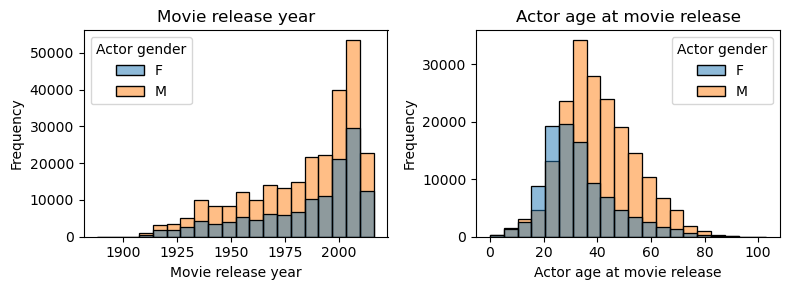

In [9]:
# Variables of interest
#variables = ['Movie release year', 'Actor birth year', 'Actor height', 'Actor age at movie release']

# Variables of interest
variables = ['Movie release year', 'Actor age at movie release']

# Create a figure with four subplots (one for each variable)
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# Create histograms for each variable in each subplot
for i, variable in enumerate(variables):
    ax = axes[i]

    # Create histograms for female and male characters for the current variable
    sns.histplot(data=character_metadata, x=variable, bins=20, alpha=0.5, hue='Actor gender', multiple='layer', ax=ax)

    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')
    ax.set_title(variable)


# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.savefig('figures/gender/histplots.png', dpi=1000, bbox_inches='tight')
plt.show()




The histogram backs up the claims made from the box plots.

We might want to log-transform **Movie release year**.

### Explore **Actor age at movie release**

To explore the statistical difference further, we look at the attribute **Actor age at movie release** throughout all the years for female and male characters.

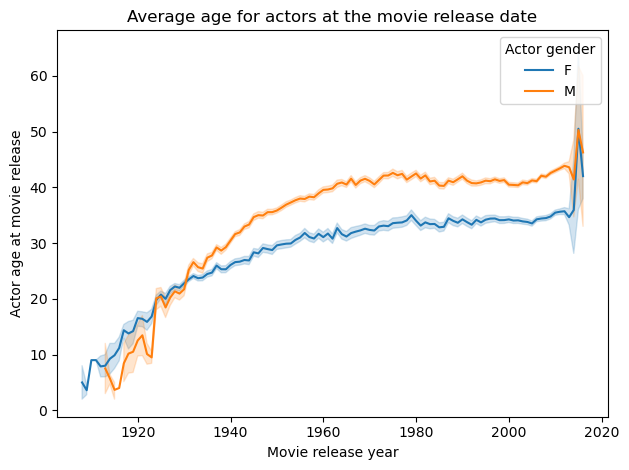

In [10]:
# Remove NaNs from relevant columns
character_metadata_nona = character_metadata[['Movie release year', 'Actor age at movie release', 'Actor gender']].dropna()
sns.lineplot(x='Movie release year', y='Actor age at movie release', data=character_metadata_nona, hue="Actor gender", err_style="band")

plt.title('Average age for actors at the movie release date')
plt.xlabel('Movie release year')
plt.ylabel('Actor age at movie release')
plt.tight_layout()
plt.savefig('figures/gender/gender_age.png', dpi=1000, bbox_inches='tight')
plt.show()


The plot is very strange up until around 1930. It seems that actors are very young (20 years or younger on average).

However, the plot shows that female actors are significantly younger than male actors from around year 1930 and forward.

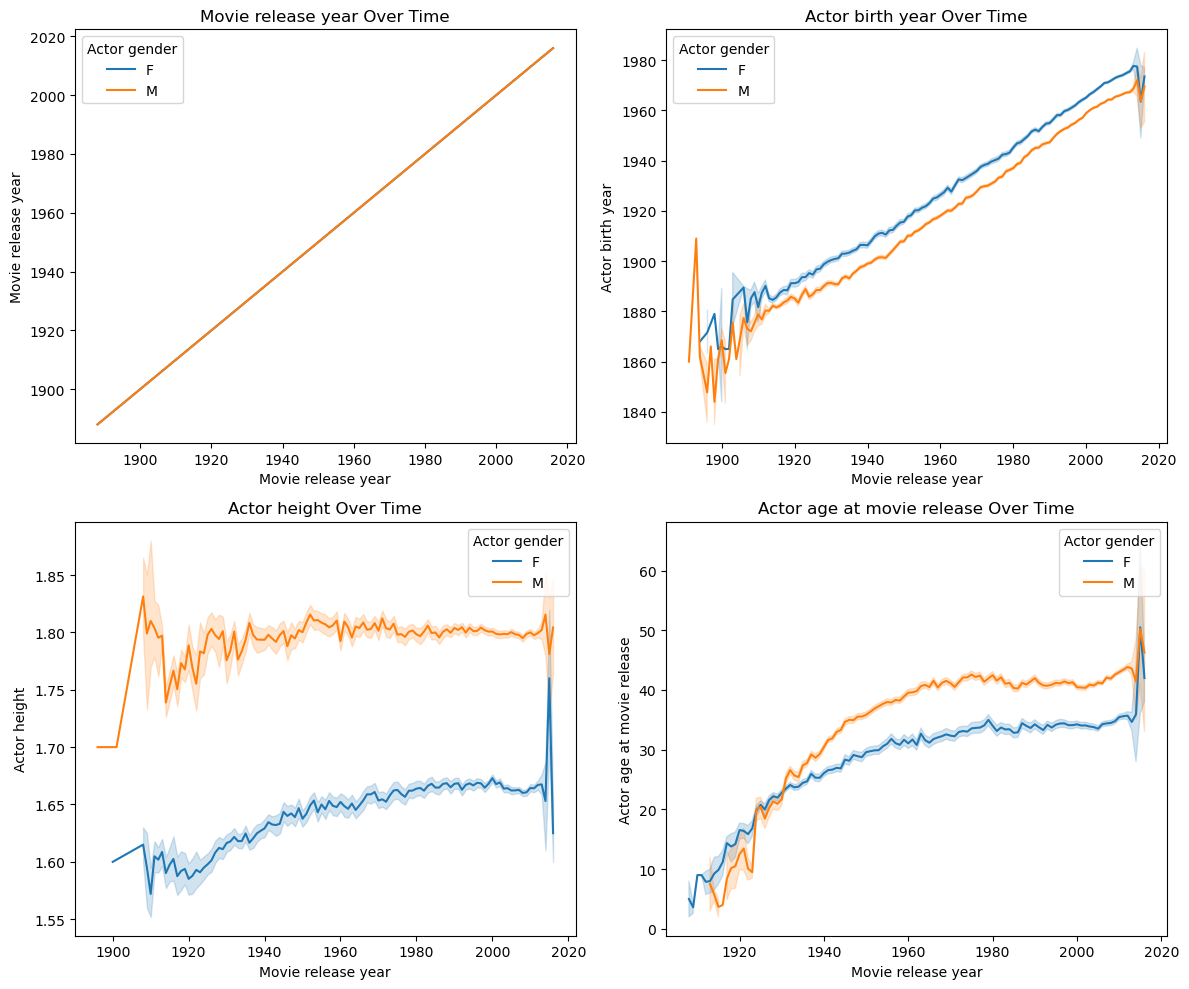

In [11]:
# Do it for all variables of interest (doesn't make sense actually)

# Variables of interest
variables = ['Movie release year', 'Actor birth year', 'Actor height', 'Actor age at movie release']

# Create four subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create line plots for each variable in each subplot
for i, variable in enumerate(variables):
    ax = axes[i]

    # Filter data and drop missing values
    #data_variable = character_metadata[['Movie release year', 'Actor age at movie release', 'Actor gender', variable]].dropna()

    # Use sns.lineplot with 'Actor gender' as 'hue'
    sns.lineplot(data=character_metadata, x='Movie release year', y=variable, hue="Actor gender", err_style="band", ax=ax)

    ax.set_title(f'{variable} Over Time')
    ax.set_xlabel('Movie release year')
    ax.set_ylabel(variable)
    ax.legend(title='Actor gender')

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()


In [12]:
character_metadata_with_rev = character_metadata.merge(movie_metadata[['Wikipedia Movie ID', 'Movie box office revenue', 'log Movie box office revenue']], 
                                                      how='inner', 
                                                      on='Wikipedia Movie ID')

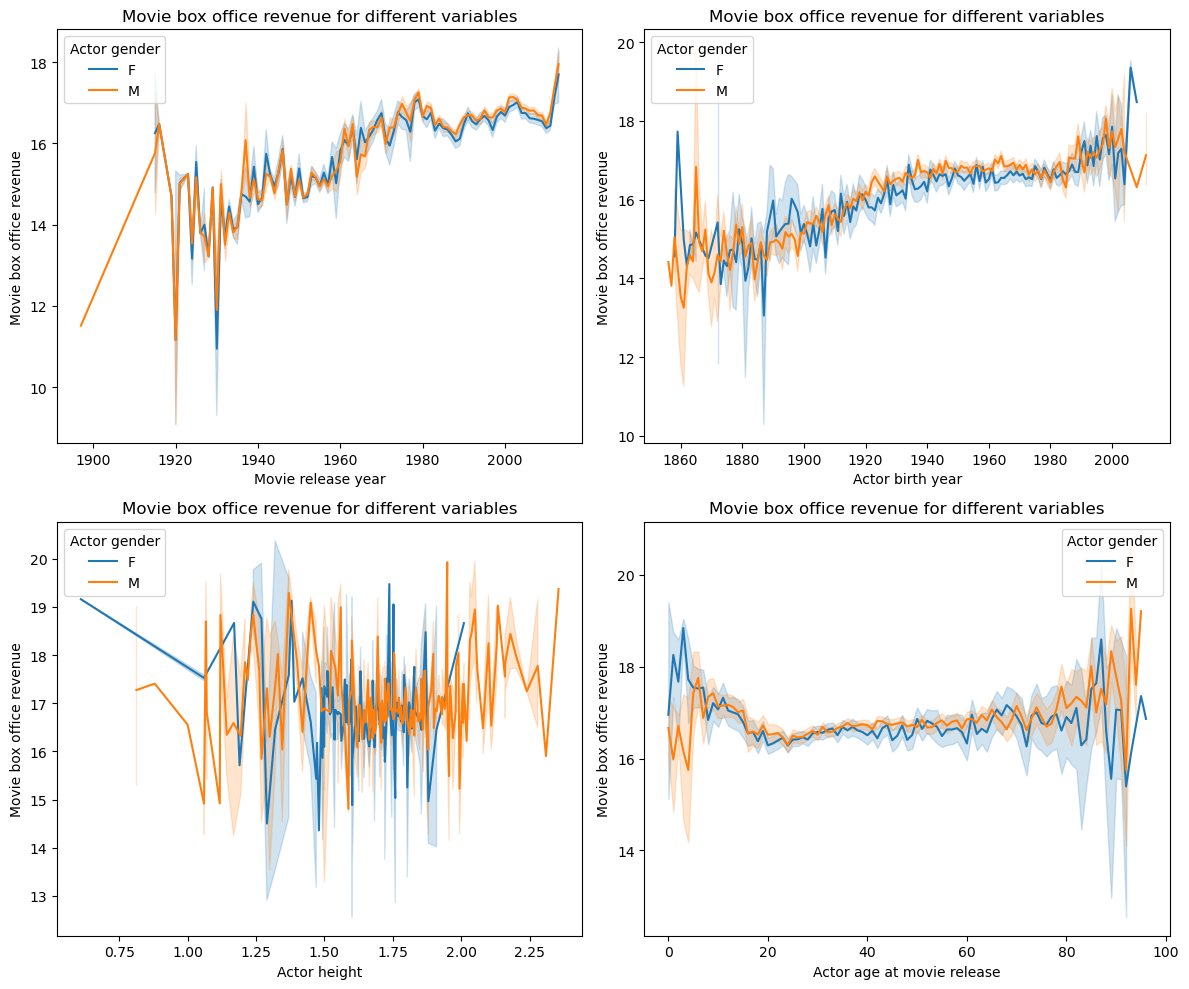

In [13]:

# Variables of interest
variables = ['Movie release year', 'Actor birth year', 'Actor height', 'Actor age at movie release']

# Create four subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create line plots for each variable in each subplot
for i, variable in enumerate(variables):
    ax = axes[i]

    # Filter data and drop missing values
    #data_variable = character_metadata[['Movie release year', 'Actor age at movie release', 'Actor gender', variable]].dropna()

    # Use sns.lineplot with 'Actor gender' as 'hue'
    sns.lineplot(data=character_metadata_with_rev, x=variable, y='log Movie box office revenue', hue="Actor gender", err_style="band", ax=ax)

    ax.set_ylabel('Movie box office revenue')
    ax.set_xlabel(variable)
    ax.legend(title='Actor gender')

# Adjust the layout to prevent overlapping
plt.set_title('Movie box office revenue for different variables')
plt.tight_layout()
plt.show()

##  Distribution of variables in the movies dataset

In [14]:
numerical_variables = ['Movie box office revenue', 'Movie runtime', 'Movie release year']

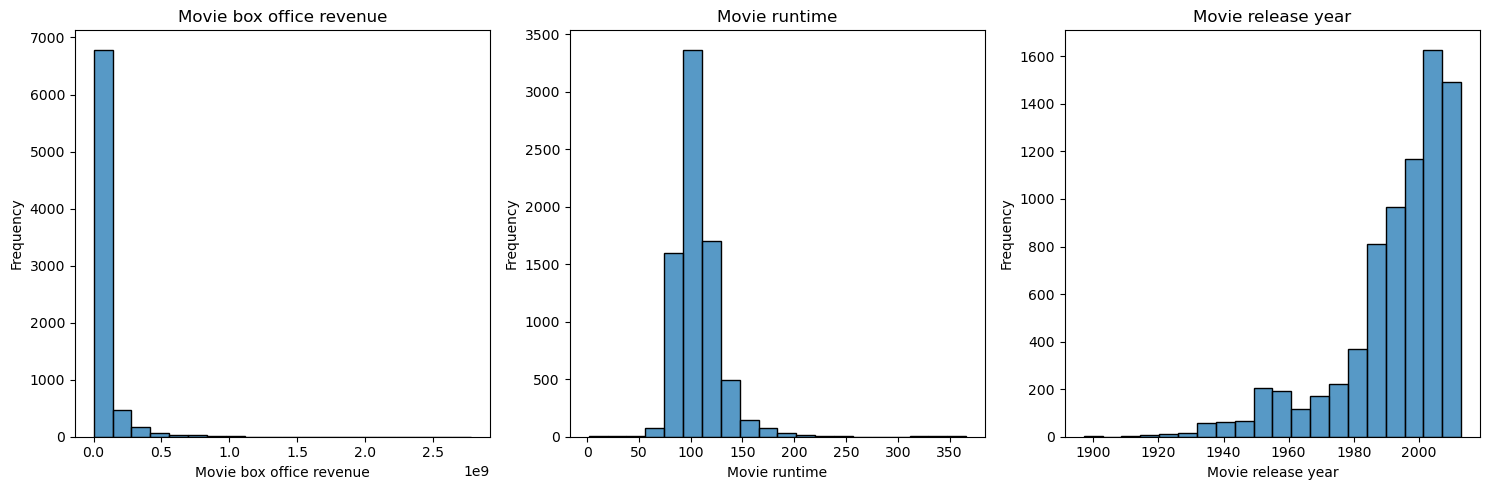

In [15]:
# Create a figure with four subplots (one for each variable)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create histograms for each variable in each subplot
for i, variable in enumerate(numerical_variables):
    ax = axes[i]

    # Create histograms for female and male characters for the current variable
    sns.histplot(data=movie_metadata, x=variable, ax=ax, bins=20)

    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')
    ax.set_title(variable)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

The plots show, that **Movie box office** has a highly right skewed distribution, also called a power law. We would need to transform this  attribute for further analysis.

The variable **Movie runtime** seem fairly normally distributed. The variable **Movie release year** is left skewed, so we will also try to apply a log transform to this.

In [16]:
movie_metadata['log Movie box office revenue'] = np.log(movie_metadata['Movie box office revenue'])

movie_metadata['log Movie release year'] = np.log(movie_metadata['Movie release year'])
character_metadata['log Movie release year'] = np.log(character_metadata['Movie release year'])

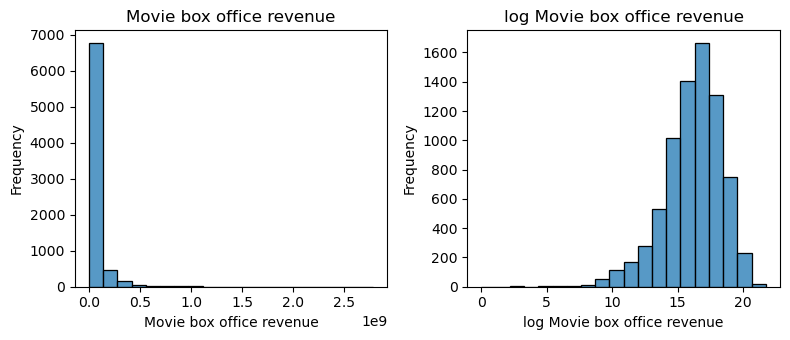

In [17]:
box_office_variables = ['Movie box office revenue', 'log Movie box office revenue']

fig, axes = plt.subplots(1, 2, figsize=(8, 3.5))

# Create histograms for each variable in each subplot
for i, variable in enumerate(box_office_variables):
    ax = axes[i]

    # Create histograms for female and male characters for the current variable
    sns.histplot(data=movie_metadata, x=variable, ax=ax, bins=20)

    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')
    ax.set_title(variable)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.savefig("figures/dist_and_clean/log_movie_box_revenue.png", dpi=1000, bbox_inches='tight')
plt.show()

In [18]:
subset_rev_year = movie_metadata[['Movie release year', "log Movie box office revenue"]].dropna()

# Perform linear regression
X = subset_rev_year['Movie release year']
X = sm.add_constant(X)  # Add an intercept term
y = subset_rev_year["log Movie box office revenue"]

model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                                 OLS Regression Results                                 
Dep. Variable:     log Movie box office revenue   R-squared:                       0.026
Model:                                      OLS   Adj. R-squared:                  0.026
Method:                           Least Squares   F-statistic:                     203.1
Date:                          Wed, 20 Dec 2023   Prob (F-statistic):           1.70e-45
Time:                                  12:22:18   Log-Likelihood:                -16691.
No. Observations:                          7563   AIC:                         3.339e+04
Df Residuals:                              7561   BIC:                         3.340e+04
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [19]:
inflation_data = pd.read_csv('inflation_data.csv')
inflation_data.rename(columns={'year': 'Movie release year'}, inplace=True)

movie_metadata_inflation = movie_metadata.merge(inflation_data[['Movie release year', 'amount']], how='left', on='Movie release year')
movie_metadata_inflation.rename(columns={'amount': 'Dollar value'}, inplace=True)

movie_metadata['balanced Movie box office revenue'] = (movie_metadata_inflation['Movie box office revenue']) / (movie_metadata_inflation['Dollar value'])
movie_metadata['log balanced Movie box office revenue'] = np.log10((movie_metadata['balanced Movie box office revenue']))


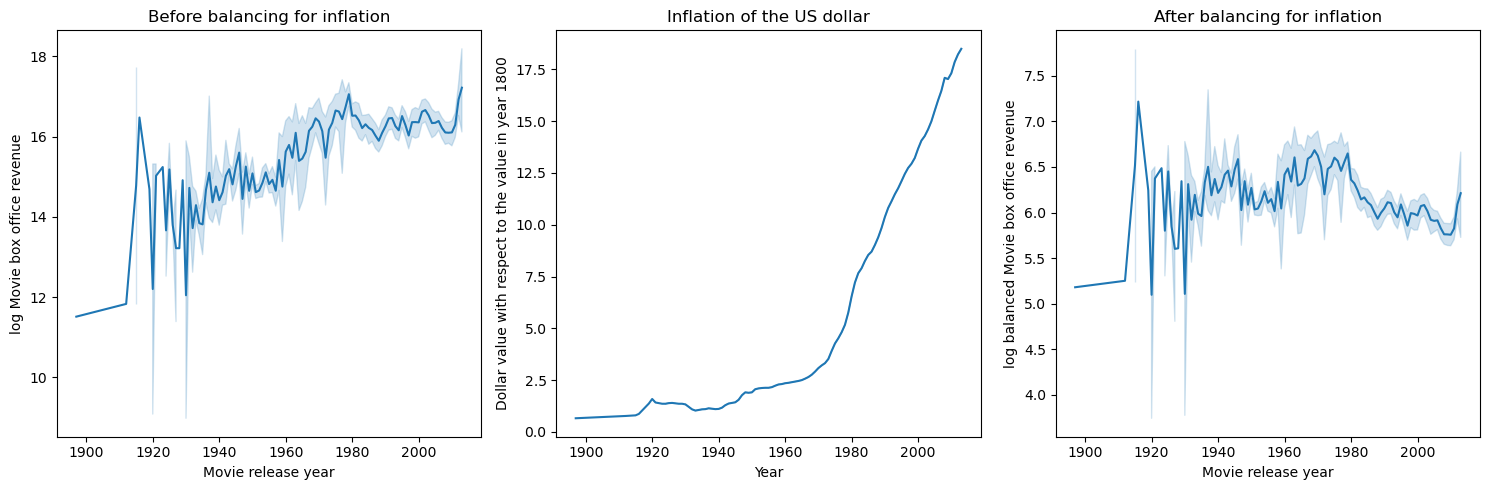

In [38]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# First subplot - log Movie box office revenue trend
sns.lineplot(data=movie_metadata, x='Movie release year', y='log Movie box office revenue', ax=axes[0])
#sns.regplot(data=movie_metadata, x='Movie release year', y='log Movie box office revenue', scatter=False, ax=axes[0])
axes[0].set_title('Before balancing for inflation')
axes[0].set_xlabel('Movie release year')
axes[0].set_ylabel('log Movie box office revenue')

# Second subplot - Inflation of the dollar
sns.lineplot(data=movie_metadata_inflation, x='Movie release year', y='Dollar value', ax=axes[1])
axes[1].set_title('Inflation of the US dollar')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Dollar value with respect to the value in year 1800')

sns.lineplot(data=movie_metadata, x='Movie release year', y='log balanced Movie box office revenue', ax=axes[2])
#sns.regplot(data=movie_metadata, x='Movie release year', y='log balanced Movie box office revenue', scatter=False, ax=axes[2])
axes[2].set_title('After balancing for inflation')
axes[2].set_xlabel('Movie release year')
axes[2].set_ylabel('log balanced Movie box office revenue')

# Adjust layout
plt.tight_layout()

# Save the entire figure
plt.savefig("figures/dist_and_clean/inflation_plots.png", dpi=1000, bbox_inches='tight')

# Show the plots
plt.show()

In [39]:
subset_rev_year_balanced = movie_metadata[['Movie release year', "log balanced Movie box office revenue"]].dropna()

# Perform linear regression
X = subset_rev_year_balanced['Movie release year']
X = sm.add_constant(X)  # Add an intercept term
y = subset_rev_year_balanced["log balanced Movie box office revenue"]

model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                                      OLS Regression Results                                     
Dep. Variable:     log balanced Movie box office revenue   R-squared:                       0.019
Model:                                               OLS   Adj. R-squared:                  0.019
Method:                                    Least Squares   F-statistic:                     145.6
Date:                                   Wed, 20 Dec 2023   Prob (F-statistic):           3.19e-33
Time:                                           12:52:44   Log-Likelihood:                -10388.
No. Observations:                                   7563   AIC:                         2.078e+04
Df Residuals:                                       7561   BIC:                         2.079e+04
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

After the log transform, **Movie box office revenue** is fairly normally distributed, but the log transform didn't do much for **Movie release year**, so we will keep this as it is.

### Categorical values

Let us take a look at the categorical values.

In [22]:
categorical_variables = ['Movie genres', 'Movie languages', 'Movie countries']

movie_metadata[categorical_variables].head()

,Movie genres,Movie languages,Movie countries
0,"['Thriller', 'Science Fiction', 'Horror', 'Adv...",['English'],['United States of America']
1,"['Costume drama', 'War film', 'Epic', 'Period ...",['English'],['United Kingdom']
2,"[""Children's/Family"", 'Musical', 'Fantasy', 'C...",['English'],['United States of America']
3,"['Crime Fiction', 'Drama', 'Coming of age']",['English'],['United States of America']
4,"['Black comedy', 'Comedy']",['English'],"['United States of America', 'Netherlands']"


In [23]:
import ast
for variable in categorical_variables:
    # Explode the lists in the column
    if (variable == 'Movie genres'):
        exploded_values = movie_metadata[variable].explode().reset_index()
    else:
        # Convert stringified lists to actual lists using ast.literal_eval
        exploded_values = movie_metadata[variable].apply(ast.literal_eval).explode().reset_index()

    # Count the unique values
    unique_values = exploded_values[variable].unique()
    print(f"Number of unique {variable}: {len(unique_values)}")

Number of unique Movie genres: 6022
Number of unique Movie languages: 142
Number of unique Movie countries: 91


## Further exploration

### Gender representation in movies

We now want to further analyse our data by exploring the difference in representation of female and male actors in movies. We begin by counting the number of female and male actor in movies throughout the years.

In [24]:
# Divide data set into male and female data set

female_characters = character_metadata[character_metadata['Actor gender'] == 'F']
male_characters = character_metadata[character_metadata['Actor gender'] == 'M']

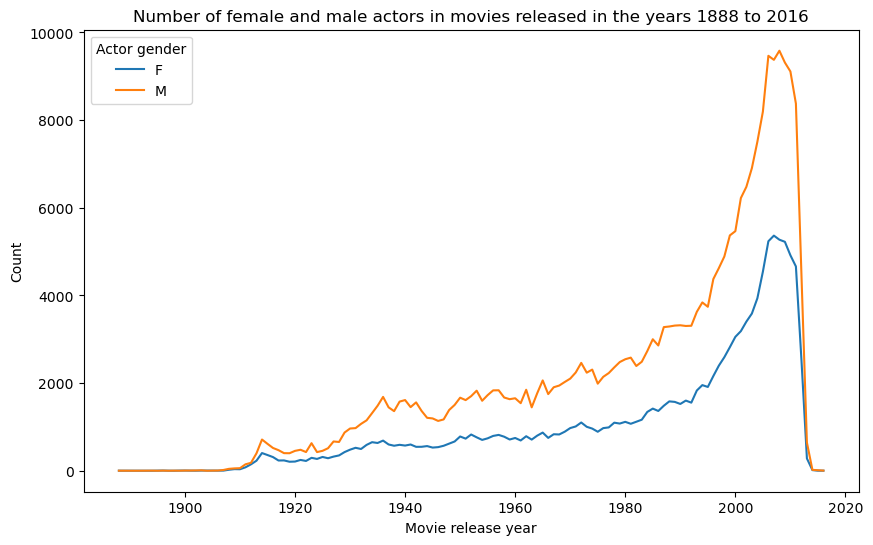

In [25]:
gender_counts = character_metadata.groupby(['Movie release year', 'Actor gender']).size().reset_index(name='Count')
 
# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=gender_counts, x='Movie release year', y='Count', hue='Actor gender')
plt.title('Number of female and male actors in movies released in the years 1888 to 2016')
plt.xlabel('Movie release year')
plt.ylabel('Count')
plt.legend(title='Actor gender')
plt.savefig("figures/gender/gender_count_release_year.png", dpi=1000, bbox_inches='tight')
plt.show()

As we can see, there are generally fewer female actors in movies than male actors.

Next, we will explore the percentage of female characters in movies throughout the years. Firstly, we calculate the percentage of females for each movie and then take the average over each year. We then make a linear regression to see, if there is a change of percentage of female actors in movies over the years.

/Users/bruger/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


                                 OLS Regression Results                                 
Dep. Variable:     Percentage female characters   R-squared:                       0.028
Model:                                      OLS   Adj. R-squared:                  0.018
Method:                           Least Squares   F-statistic:                     2.725
Date:                          Wed, 20 Dec 2023   Prob (F-statistic):              0.102
Time:                                  12:22:35   Log-Likelihood:                -271.17
No. Observations:                            96   AIC:                             546.3
Df Residuals:                                94   BIC:                             551.5
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

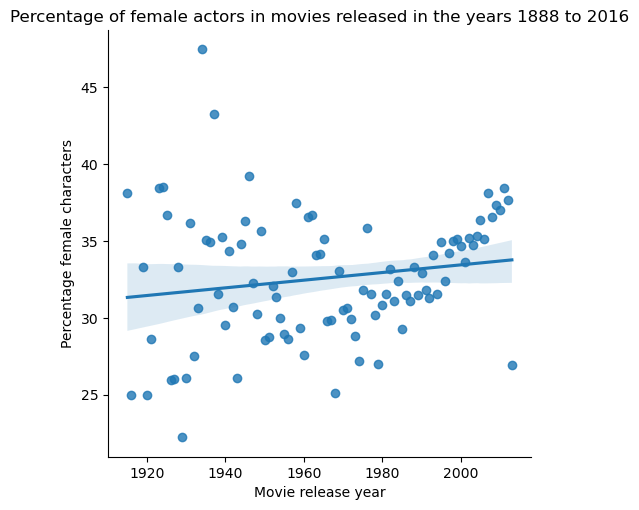

In [26]:
# Count number of female in each movie
female_count = female_characters.groupby('Wikipedia Movie ID').size()
male_count = male_characters.groupby('Wikipedia Movie ID').size()

# Ensure that all Wikipedia Movie IDs in 'female_count' are represented in 'male_count'
# Fill missing values with 0
male_count = male_count.reindex(female_count.index, fill_value=0)

# Calculate the percentage of female characters
percentage_female = (female_count / (female_count + male_count)) * 100

# Reset the index to have 'Wikipedia Movie ID' as a column
percentage_female = percentage_female.reset_index()

# Rename the columns for clarity
percentage_female.columns = ['Wikipedia Movie ID', 'Percentage female characters']

# Merge dataframes
percentage_female_with_year = pd.merge(percentage_female, movie_metadata, on='Wikipedia Movie ID', how='left')

# Calculate female percentage pr. year and make into a data frame with column 'Movie release year' and 'Percentage female characters'
percentage_female_per_year = percentage_female_with_year.groupby('Movie release year')['Percentage female characters'].mean()
percentage_female_per_year = percentage_female_per_year.reset_index(name="Percentage female characters")
percentage_female_per_year['Movie release year'] = pd.to_numeric(percentage_female_per_year['Movie release year'], errors='coerce').astype(float)

# Drop missing values
percentage_female_per_year = percentage_female_per_year.dropna()

sns.lmplot(x='Movie release year', y="Percentage female characters", data=percentage_female_per_year)

# Perform linear regression
X = percentage_female_per_year['Movie release year']
X = sm.add_constant(X)  # Add an intercept term
y = percentage_female_per_year["Percentage female characters"]

model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

plt.title('Percentage of female actors in movies released in the years 1888 to 2016')
plt.savefig("figures/gender/female_percentage_release_year.png", dpi=1000, bbox_inches='tight')
plt.show()

The plot and linear regression indicates, that there is a significant decline of female characters over the years. But looking at the plot, the ends have a very high variance. Let us take a look at the count of movies over the years.

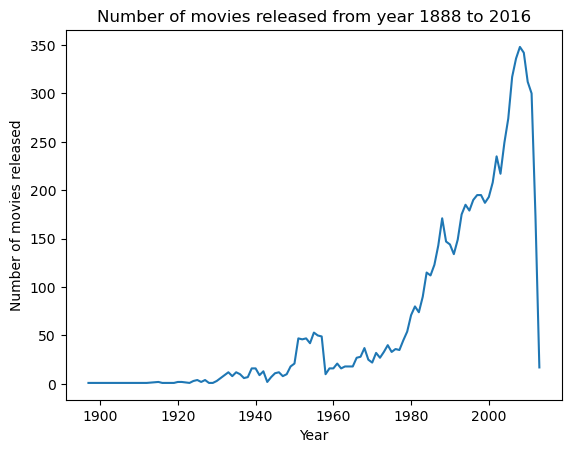

In [27]:
no_movies = movie_metadata.groupby('Movie release year').size()
plt.plot(no_movies)
plt.title('Number of movies released from year 1888 to 2016')
plt.xlabel('Year')
plt.ylabel('Number of movies released')
plt.show()

Since there isn't a lot of movies and the variance is very height in the 'end' years, we look at the progression of female characters from year 1940 to 2012.

/Users/bruger/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


                                 OLS Regression Results                                 
Dep. Variable:     Percentage female characters   R-squared:                       0.157
Model:                                      OLS   Adj. R-squared:                  0.145
Method:                           Least Squares   F-statistic:                     13.25
Date:                          Wed, 20 Dec 2023   Prob (F-statistic):           0.000513
Time:                                  12:22:40   Log-Likelihood:                -181.35
No. Observations:                            73   AIC:                             366.7
Df Residuals:                                71   BIC:                             371.3
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

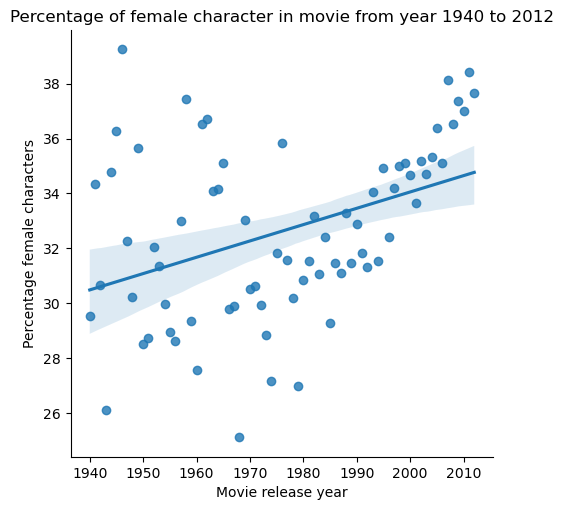

In [28]:
condition = (percentage_female_per_year['Movie release year'] < 1940) | (percentage_female_per_year['Movie release year'] > 2012)
percentage_female_per_year_filtered = percentage_female_per_year
percentage_female_per_year_filtered.loc[condition, 'Movie release year'] = np.nan
percentage_female_per_year_filtered = percentage_female_per_year_filtered.dropna()

sns.lmplot(x='Movie release year', y="Percentage female characters", data=percentage_female_per_year_filtered)

# Perform linear regression
X = percentage_female_per_year_filtered['Movie release year']
X = sm.add_constant(X)  # Add an intercept term
y = percentage_female_per_year_filtered["Percentage female characters"]

model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

plt.title('Percentage of female character in movie from year 1940 to 2012')
plt.savefig("figures/gender/female_percentage_release_year_filtered.png", dpi=1000, bbox_inches='tight')
plt.show()

The linear regression above indicates, that there is no decline, but rather an incline in female characters. However, the p-value = 0.017, so the incline is not significant with a .05 significance level.

### Gender's affect on box office revenue

We will now see if percentage of female characters have a significant correlation with **Movie box office revenue**. We will keep in mind, that we only have box office revenue for around 10% of the movies. However, this is still around 10'000 movies.

                                      OLS Regression Results                                     
Dep. Variable:     log balanced Movie box office revenue   R-squared:                       0.018
Model:                                               OLS   Adj. R-squared:                  0.018
Method:                                    Least Squares   F-statistic:                     130.9
Date:                                   Wed, 20 Dec 2023   Prob (F-statistic):           4.65e-30
Time:                                           12:22:49   Log-Likelihood:                -9743.4
No. Observations:                                   7183   AIC:                         1.949e+04
Df Residuals:                                       7181   BIC:                         1.950e+04
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

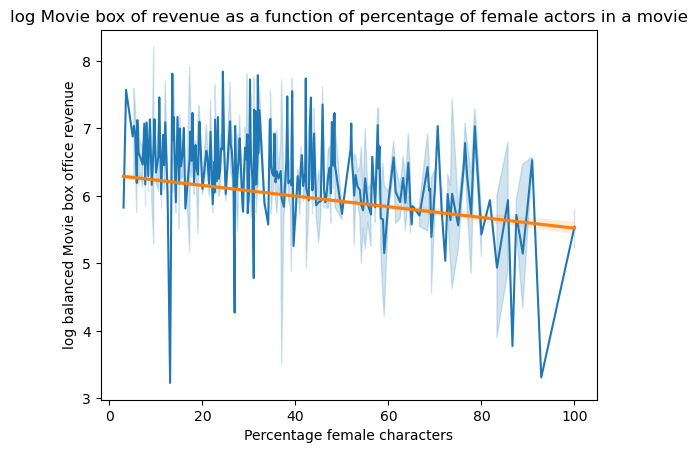

In [29]:
# Define dataframe with 'log Movie box office revenue' and 'Percentage female characters'
percentage_female_with_log_rev = percentage_female_with_year[['log balanced Movie box office revenue', 'Percentage female characters']].dropna()

# Create a line plot
sns.lineplot(data=percentage_female_with_log_rev, x='Percentage female characters', y='log balanced Movie box office revenue')

# Add a trend line using regplot
sns.regplot(data=percentage_female_with_log_rev, x='Percentage female characters', y='log balanced Movie box office revenue', scatter=False)

# Perform linear regression
X = percentage_female_with_log_rev["Percentage female characters"]
X = sm.add_constant(X)  # Add an intercept term
y = percentage_female_with_log_rev["log balanced Movie box office revenue"]

model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

plt.title('log Movie box of revenue as a function of percentage of female actors in a movie')
plt.savefig('figures/gender/female_percentage_revenue.png', dpi=1000, bbox_inches='tight')
plt.show()


The plot and linear regression indicates, that there is a significant decline in box office revenue, as the percentage of female characters increases.

In [30]:
movie_metadata.to_csv('data_cleaned/movie_cleaned.csv')
character_metadata.to_csv('data_cleaned/character_cleaned.csv')